In [ ]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [ ]:
!pip install langchain-groq langgraph --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.3/469.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 18.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.2 which is incompatible.


In [ ]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, AIMessage

In [ ]:
llm = ChatGroq(
    model="openai/gpt-oss-20b",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2
)

In [ ]:
!pip install langchain_tavily langchain_community --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
if "TAVILY_API_KEY" not in os.environ:
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Enter your Tavily API key: ")

Enter your Tavily API key: ··········


In [ ]:
from langchain_tavily import TavilySearch

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

In [ ]:
tavily_search = TavilySearch(
      max_results=3,
      search_depth="advanced",
      include_domains=["who.int"],
      include_raw_content=True
  )

In [ ]:
question = "What is the latest WHO report on malaria?"
search_results = tavily_search.invoke(question)

In [ ]:
search_results

{'query': 'What is the latest WHO report on malaria?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2024',
   'title': 'World malaria report 2024',
   'content': "According to WHO's latest World malaria report, there were an estimated 263 million cases and 597 000 malaria deaths worldwide in 2023. This",
   'score': 0.8803145,
   'raw_content': None},
  {'url': 'https://www.who.int/news-room/fact-sheets/detail/malaria',
   'title': 'Malaria',
   'content': 'According to the latest World malaria report, there were 263 million cases of malaria in 2023 compared to 252 million cases in 2022. The',
   'score': 0.8506799,
   'raw_content': None},
  {'url': 'https://www.who.int/campaigns/world-malaria-day/2025',
   'title': 'World Malaria Day 2025',
   'content': '25 April 2025: 597 000 malaria deaths in 2023, 263 million new cases of malaria in 2023, 95% of all malaria cases

In [ ]:
scraped_docs = []
urls = [result.get("url") for result in search_results["results"] if result.get("url")]
print(f"Found URLs: {urls}")

if not urls:
    print("No valid URLs in search results.")

for url in urls:
    try:
        print(f"Scraping {url}...")
        loader = WebBaseLoader(url)
        docs = loader.load()
        for doc in docs:
            doc.metadata["source"] = url
        scraped_docs.extend(docs)
    except Exception as e:
        print(f"Error scraping {url}: {e}")

print(f"Scraped {len(scraped_docs)} documents.")

Found URLs: ['https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2024', 'https://www.who.int/news-room/fact-sheets/detail/malaria', 'https://www.who.int/campaigns/world-malaria-day/2025']
Scraping https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2024...
Scraping https://www.who.int/news-room/fact-sheets/detail/malaria...
Scraping https://www.who.int/campaigns/world-malaria-day/2025...
Scraped 3 documents.


In [ ]:
scraped_docs[1]

Document(metadata={'source': 'https://www.who.int/news-room/fact-sheets/detail/malaria', 'title': '\r\n\tMalaria\r\n', 'description': 'WHO fact sheet on malaria providing key facts, definition, information on transmission, symptoms, who is at risk, diagnosis, treatment, prevention, insecticide resistance, surveillance, elimination, vaccines and WHO response.', 'language': 'en'}, page_content='      \r\n\tMalaria\r\n                     \n   Skip to main content       \n\n\n \n\n\n\n\n\r\nWorld Health Organization                    \nGlobal\n\n\nRegions\n\n\n\n\n\r\nWorld Health Organization                                    \nWHO Regional websites\n\n\n\n\n\n\n\n\n\n\n\n   \n\n\n\n\n\n\n\n\n\n\n\n\n\nWhen autocomplete results are available use up and down arrows to review and enter to select.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n        Select language\r\n    \n\nSelect language\nEnglish\nالعربية\n中文\nFrançais\nРусский\nEspañol\n\n\n\n\n        \n            \n\n\n\n\n\n\n\n\n\n\n     

In [ ]:
from langchain_core.documents import Document
from typing import List
from typing_extensions import TypedDict

In [ ]:
class GraphState(TypedDict):
    question: str
    documents: List[Document]
    sender: str # web_search_node

In [ ]:
def web_search_node(state: GraphState) -> GraphState:
    """Searches the web for information, then scrapes the content from the resulting URLs."""
    print("--- Calling Web Search Node ---")
    question = state["question"]

    tavily_search = TavilySearch(
        max_results=2,
        search_depth="advanced",
        include_domains=["who.int"]
    )
    search_results = tavily_search.invoke(question)

    scraped_docs = []
    if not search_results or "results" not in search_results:
        print("No search results found.")
        return {"documents": [], "sender": "web_search_node"}

    urls = [result.get("url") for result in search_results["results"] if result.get("url")]
    print(f"Found URLs: {urls}")

    if not urls:
        print("No valid URLs in search results.")
        return {"documents": [], "sender": "web_search_node"}

    for url in urls:
        try:
            print(f"Scraping {url}...")
            loader = WebBaseLoader(url)
            docs = loader.load()
            for doc in docs:
                doc.metadata["source"] = url
            scraped_docs.extend(docs)
        except Exception as e:
            print(f"Error scraping {url}: {e}")

    print(f"Scraped {len(scraped_docs)} documents.")
    return {"documents": scraped_docs, "sender": "web_search_node"}

In [ ]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(GraphState)

In [ ]:
workflow.add_node("web_search", web_search_node)

In [ ]:
workflow.add_edge("web_search", END)

In [ ]:
workflow.set_entry_point("web_search")

In [ ]:
app = workflow.compile()

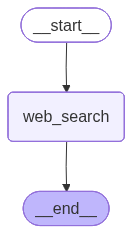

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
inputs = {"question": "What is the latest WHO report on malaria?"}

for output in app.stream(inputs):
    for key, value in output.items():
        print(f"\n--- Output from Node: {key} ---")

        if 'documents' in value and value['documents']:
            print(f"Documents found: {len(value['documents'])}")
            print("-" * 30)

            for i, doc in enumerate(value['documents']):
                print(f"\n--- Document {i+1} ---")
                print(f"Source: {doc.metadata.get('source', 'No source available')}")
                print("\nContent:")
                print(doc.page_content)
        else:
            print("No documents found in this step.")

--- Calling Web Search Node ---
Found URLs: ['https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2024', 'https://www.who.int/campaigns/world-malaria-day/2025']
Scraping https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2024...
Scraping https://www.who.int/campaigns/world-malaria-day/2025...
Scraped 2 documents.

--- Output from Node: web_search ---
Documents found: 2
------------------------------

--- Document 1 ---
Source: https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2024

Content:
      
	World malaria report 2024
                     
   Skip to main content       


 







Global


Regions







WHO Regional websites







Africa





Americas





South-East Asia





Europe





Eastern Mediterranean





Western Pacific









   













When autocomplete results are available use up and down arrows to review and enter to select.
















        Select language
    